# Medical image processing

 Some parts of this text were adapted from DataCamp's Biomedical Image Analysis in Python
 https://www.datacamp.com/courses/biomedical-image-analysis-in-python

Types of analysis:  
    - measure organ shape
    - analysis of tissue composition
    - look at patterns to predict pathology

Foetal ultrasound 
    - measure density of bridge of nose
    - measure curvature of the neck
    - measure circumference of head

Rely on python packages such as:
    - imageio - read and save images
    - numpy - image objects are NumPy arrays
    - opencv - open computer vision library 

We could, for example,  slice the image data along specific dimensions.

Use example DICOM image, PIG_CT

In [3]:
#import library imageio and read the file PIG_CT
import imageio
im=imageio.imread('../../Images/PIG_CT')

In [4]:
type(im)


imageio.core.util.Array

In [5]:
im


Array([[-1013, -1015, -1008, ..., -1006, -1005, -1001],
       [-1001, -1005, -1014, ..., -1007, -1006, -1001],
       [ -998,  -996, -1003, ..., -1010, -1005,  -996],
       ...,
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1019, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1017, -1014, ..., -1024, -1024, -1024]], dtype=int16)

In [6]:
im[0,0]

-1013

In [7]:
im[1:3, 1:3]

Array([[-1005, -1014],
       [ -996, -1003]], dtype=int16)

In [8]:
im.dtype

dtype('int16')

## Metadata - the who, what, when, where and how of image acquisition

We can read the DICOM metadata with imageio.  
Meta is a python dictionary.

Attribute, meta, of image, im.

In [9]:
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.7'),
      ('SOPInstanceUID',
       '1.2.840.113713.4.1276015101.480000.1717357275536809497'),
      ('StudyDate', '20100608'),
      ('AcquisitionDate', '20090610'),
      ('ContentDate', '20090610'),
      ('StudyTime', '183821'),
      ('AcquisitionTime', '070055'),
      ('ContentTime', '070100.352000 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'Philips'),
      ('PatientName', 'c1f306a2p0ae98p'),
      ('PatientID', '82b03eedp1ca0ep'),
      ('PatientBirthDate', '20091107'),
      ('PatientSex', 'O '),
      ('SliceSpacing', 0.4),
      ('StudyInstanceUID', '1.2.840.113704.1.01.656.53821.65625.5'),
      ('SeriesInstanceUID', '1.2.840.113704.1.01.656.53821.65625.7'),
      ('SeriesNumber', 2),
      ('InstanceNumber', 1),
      ('ImagePositionPatient', (-122.398825, 22.8359261, -261.500061)),
      ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)),
      ('SamplesPe

In [10]:
im.meta['Modality']

'CT'

In [11]:
im.meta['sampling']

(0.566406, 0.566406)

See all available information (keys())

In [12]:
im.meta.keys()

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'SliceSpacing', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])

## Plotting images

We can use Matplotlib's imshow() function to display 2D image data

Use grayscale colormap (cmap='gray')

Turn off Axis ticks and labels for image. plt.axis('off')

In [13]:
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()

Instructions:  

    -Import imageio
    
    -read in PIG_MR using imread() method
    
    -Print type() and shape (number of pixels) of image, im.

In [15]:
import imageio

im=imageio.imread("../../Images/PIG_MR")
print("image type:",type(im))
print("Shape of image array:", im.shape)

image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


## Metadata 

ImageIO reads in data as Image objects, which are NumPy arrays with a metadata dictionary.

Metadata needs to be rich and can include:
    - Demographics (name, age, sex )
    - Clinical Information
    - Information about image acquisition (image shape, sampling rate, data type, modality)

In [16]:
im.meta['StudyDate']

'20090610'

In [17]:
im.meta['Modality']

'MR'

In [18]:
im.meta['PatientName']

'e73e1b9fp0f047p'

## Plotting Images with different colormaps

Arguments for Matplotlib's imshow():
    - cmap (to control color mappings for each value)

(Taken from https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html )


cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

In [19]:
plt.imshow(im,cmap='OrRd')

#plot colorbar alongside plot 
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

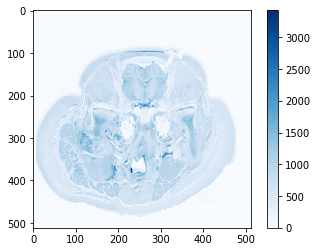

In [20]:
plt.imshow(im,cmap='Blues')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")


In [21]:
plt.imshow(im,cmap='gray')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")


### Turn axes and ticks off

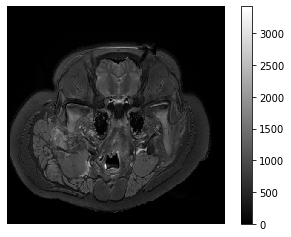

In [22]:
plt.imshow(im,cmap='gray')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
plt.axis('off')
plt.show()

## Plotting images with different graylevel regions

In [24]:
# Use image PIG_CT
import imageio
im=imageio.imread('../../Images/PIG_CT')

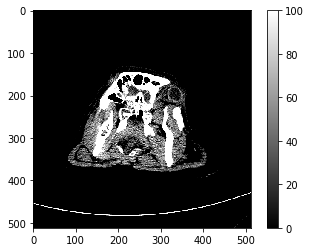

In [25]:
plt.imshow(im,cmap='gray',vmin=0,vmax=100)
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")


In [26]:
plt.imshow(im,cmap='gray',vmin=100,vmax=300)
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

In [27]:
plt.imshow(im,cmap='gray',vmin=300,vmax=1000)
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

## Create a synthetic image and experiment with vmin and vmax

### Create synthetic image

In [29]:
import numpy as np
# Create Im1, numpy array of ones, 100 by 100, of type integer
im1=np.ones((100,100),dtype=int)
# Loop through rows of matrix, multiplying them by a number between 0 and 99.
for i in range(0,100):
    im1[i,:] *= i

### print subimages (i.e. a small region from the image.)

In [30]:
print(im1[0:3,0:3])

[[0 0 0]
 [1 1 1]
 [2 2 2]]


In [31]:
print(im1[97:100,97:100])

[[97 97 97]
 [98 98 98]
 [99 99 99]]


### plot the synthetic image with grayscale

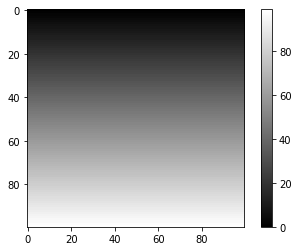

In [32]:
plt.imshow(im1,cmap='gray')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

### Plot image with vmin=40 and vmax=60

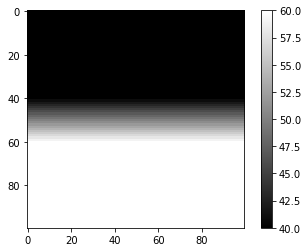

In [33]:
plt.imshow(im1,cmap='gray',vmin=40,vmax=60)
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

In [117]:
vin=np.linspace(0.0, 99.0, num=100,dtype='int')

In [118]:
vin[vin < 40] = 40
vin[vin > 60] = 60

Text(0, 0.5, 'graylevel plotted in image')

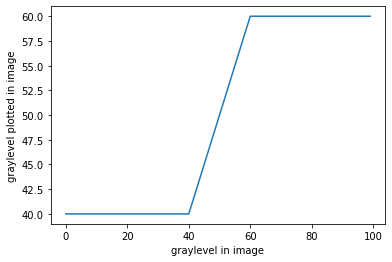

In [119]:
plt.plot(vin)
plt.xlabel('graylevel in image')
plt.ylabel('graylevel plotted in image')

## Types of images (Numpy Nd arrays)


<img src="../Figures/Ndarrays.png">

2D grayscale image (row, col) e.g. simple Xray

3D grayscale image (plane, row, col) e.g Computed Tomography (CT)

4D grayscale image (time, plane, row, col) e.g. Cardiac Positron Emission Tomography (PET)
3D + time

2D colour image (row, col, ch).  RGB colour channel expresses the colour of each pixel.

2D temporal sequence of colour images (time, row, col, ch)

In [160]:
import imageio
im1=imageio.imread('../../Images/S02A01/1.2.826.0.1.3680043.2.656.1.78.8.dcm')
im2=imageio.imread('../../Images/S02A01/1.2.826.0.1.3680043.2.656.1.78.9.dcm')
im3=imageio.imread('../../Images/S02A01/1.2.826.0.1.3680043.2.656.1.78.10.dcm')

In [161]:
im1.shape

(512, 512)

In [162]:
vol = np.stack([im1, im2, im3]) 
vol.shape 

(3, 512, 512)

Load volume directly:
    • read multi-dimensional data directly
    • assemble a volume from multiple images

In [163]:

import imageio

vol = imageio.volread('../../Images/S02A01')



#Volumetric data download from PCsub4-20090909/W0031
# https://veet.via.cornell.edu/cgi-bin/datac/signon.cgi
#ELCAP Public Lung Image Database
#The ELCAP public image database provides a set of CT images for comparing 
#different computer-aided diagnosis systems. 
#The database currently consists of an image set of 50 low-dose documented 
#whole-lung CT scans for detection. The database may be accessed at:
#http://www.via.cornell.edu/lungdb.html

#The whole-lung data set (version 1.0, released December 20, 2003)
#The whole-lung dataset consists of 50 CT scans obtained in a single
#breath hold with a 1.25 mm slice thickness. The locations of nodules
#detected by the radiologist are also provided.
# © 2010, VIA Research Group, Cornell University.

Reading DICOM (examining files): 1/10 files (10.010/10 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 10/10  (100.0%)


In [164]:
n0, n1, n2 = vol.shape

d0, d1, d2 = vol.meta['sampling']

Field of view is the physical space covered by an image.  

It can be calculated by multiplying:
 - array size dimension (shape) 
 - sampling resolution 

In [165]:
print('shape (voxels):', n0,n1,n2)
print('sampling rate (mm / voxel):',d0,d1,d2)
print('field of view (mm):', n0 * d0, n1 * d1, n2 * d2)

shape (voxels): 10 512 512
sampling rate (mm / voxel): 1.2499995555555552 0.816406 0.816406
field of view (mm): 12.499995555555552 417.999872 417.999872


## RGB to gray
### Many times in image processing, we convert a color image to grayscale.

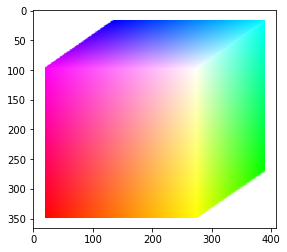

image shape:  (366, 409, 3)


In [166]:

im=imageio.imread('../../Images/Fig0608(RGB-full-color-cube).tif')
plt.imshow(im) 
plt.show()

print('image shape: ',im.shape)

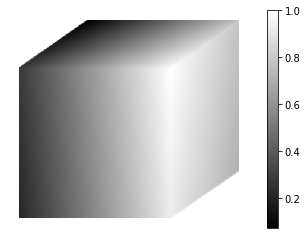

image shape:  (366, 409)


In [167]:
from skimage import color

img = color.rgb2gray(im)
plt.imshow(img,cmap='gray')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")
plt.axis('off')
plt.show()

print('image shape: ',img.shape)

### note that the image size for the color image is (366,409,3), and for the gray image is (366,409)